# Tara Harwood's Data Story - Springboard Data Science Intensive - Oct 2016

#### Note to Dan: 2016-10-10, I know this is really messy, with a lot of unnecessary data frames and repetitive variables.  It helps me to work this way, but I'll clean it up before I turn it in!  There are a lot improvements I want to make here, but I will save those until the end in case I run out of time.

## Pick a dataset - ideally the dataset for your Capstone.

### I am telling the story of the main dataset for my capstone project.  The dataset contains information about people who have signed at least one online petition with SumOfUs, aggregated by the first petition they signed. 

### In SumOfUs vocabulary, petition signers are "members" and the petitions are "campaigns". The campaigns in the dataset were all launched between Jan 2013 and Mar 2016.

* My dataset includes:
* Date of the campaign launch
* Count of all new members that joined from the campaign
* New members who found the campaign through Facebook (count and %)
* New members from each of the SumOfUs regions: USA, Canada, UK, Non-UK Europe, Australia, Rest of World (count and %)
* Engagement on the "welcome sequence", email series sent to new members in their 1st week (count and per member)
* Engagement in the members' first 14 days after joining (count and per member)
* Donations in the members' first 14 days after joining (count and per member)
* Engagement in the members' first 90 days after joining (count and per member)
* Donations in the members' first 90 days after joining (count and per member)

In [5]:
# import modules and set options
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
%matplotlib inline
pd.options.display.max_columns = None

# read aggregate data from file
ag_data = pd.read_csv('../capstone/theexportlistaggregatebycampaign.csv')
ag_data.head(5)

,page_id,name,page_created,page_type,count,fb,wel_opens,wel_clicks,wel_acts,opens_14day,clicks_14day,acts_14day,num_donations_14day,amt_donations_14day,num_recur_14day,amt_recur_14day,usa,can,uk,aus,nz,nuk_eur,row,en,de,fr,acts_90day,num_donations_90day,amt_donations_90day
0,12799,nhs-card-petition,2016-03-23 15:13:14,Petition,4317,4317,2174.0,460.0,713.0,6013.0,1108.0,1586.0,19.0,237.90,1.0,1.41,7,0,4301,0,1,7,1,4314,0,3,2410.0,74.0,657.16
1,12763,Nespresso-Muenchen-de,2016-03-21 12:28:20,Petition,1978,1495,1356.0,792.0,722.0,2444.0,1452.0,1491.0,NaN,NaN,NaN,NaN,6,0,3,2,0,1955,12,258,1714,6,2470.0,9.0,48.71
2,12705,schools-academies,2016-03-17 13:08:55,Petition,90,74,44.0,3.0,3.0,114.0,8.0,12.0,NaN,NaN,NaN,NaN,0,2,87,0,0,0,1,90,0,0,30.0,1.0,1.44
3,12689,NSW-police-crackdown,2016-03-16 19:38:22,Petition,2021,1989,1338.0,292.0,435.0,2467.0,434.0,562.0,17.0,237.92,NaN,NaN,10,3,17,1959,10,10,12,2020,0,1,955.0,45.0,510.45
4,12672,amazon-agm-usa,2016-03-16 14:20:40,Petition,180,32,87.0,19.0,16.0,152.0,25.0,156.0,NaN,NaN,NaN,NaN,173,0,2,0,0,2,3,180,0,0,202.0,NaN,NaN


In [6]:
# convert statistics into percentages and per member statistics, so we can compare across campaigns
divide_by_count_cols = ag_data.iloc[:,5:]
comp_data = pd.DataFrame(ag_data,columns=['page_id','page_created','page_type','count'])
comp_data = comp_data.join((round(divide_by_count_cols.divide(ag_data['count'], axis='index'),2)).fillna(0))
comp_data.head(5)

,page_id,page_created,page_type,count,fb,wel_opens,wel_clicks,wel_acts,opens_14day,clicks_14day,acts_14day,num_donations_14day,amt_donations_14day,num_recur_14day,amt_recur_14day,usa,can,uk,aus,nz,nuk_eur,row,en,de,fr,acts_90day,num_donations_90day,amt_donations_90day
0,12799,2016-03-23 15:13:14,Petition,4317,1.00,0.50,0.11,0.17,1.39,0.26,0.37,0.00,0.06,0.0,0.0,0.00,0.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,0.0,0.56,0.02,0.15
1,12763,2016-03-21 12:28:20,Petition,1978,0.76,0.69,0.40,0.37,1.24,0.73,0.75,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.99,0.01,0.13,0.87,0.0,1.25,0.00,0.02
2,12705,2016-03-17 13:08:55,Petition,90,0.82,0.49,0.03,0.03,1.27,0.09,0.13,0.00,0.00,0.0,0.0,0.00,0.02,0.97,0.00,0.0,0.00,0.01,1.00,0.00,0.0,0.33,0.01,0.02
3,12689,2016-03-16 19:38:22,Petition,2021,0.98,0.66,0.14,0.22,1.22,0.21,0.28,0.01,0.12,0.0,0.0,0.00,0.00,0.01,0.97,0.0,0.00,0.01,1.00,0.00,0.0,0.47,0.02,0.25
4,12672,2016-03-16 14:20:40,Petition,180,0.18,0.48,0.11,0.09,0.84,0.14,0.87,0.00,0.00,0.0,0.0,0.96,0.00,0.01,0.00,0.0,0.01,0.02,1.00,0.00,0.0,1.12,0.00,0.00


#### Can you count something interesting?

In [7]:
num_camps = ag_data['page_id'].count()
num_members = ag_data['count'].sum()
num_amt_donate_90 = ag_data['amt_donations_90day'].sum()
css="<style> span { font-family: 'Helvetica Neue', sans-serif; font-size: 15px; color:#365136} b {font-size: 20px; color:#129793} </style>"
sent1= "<span>To give you a general idea of the dataset, it contains  </span><b>"+str(num_camps)+"</b><span>  campaigns</span>"
sent2 = "<span> that inpired a total of  </span><b>"+"{:,}".format(num_members)+"</b><span>  new members to join SumOfUs.</span></br>"
sent3 = "<span> In the first 90 days after joining SumOfUs, these members donated </span><b>"+"${:0,.0f}".format(num_amt_donate_90)+".</b></span>"
text = css + sent1 + sent2 + sent3
HTML(text)

#### Can you find some trends (high, low, increase, decrease, anomalies)?

In [225]:
#make a new dataframe and calculate some new features
trend_data = pd.DataFrame(ag_data,columns=['page_id','page_created','count','amt_donations_90day'])
constant = pd.to_datetime('	2011-12-12 23:11:25')
trend_data['year'] = trend_data['page_created'].str[:4]
# trend_data.head(3)

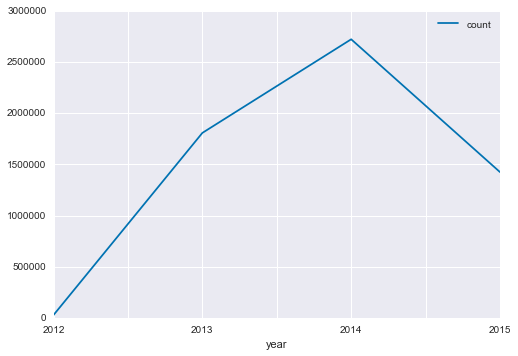

In [106]:
mpl.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])
count_group = pd.DataFrame(trend_data.groupby('year')['count'].sum())
count_group[1:5].plot()

### The above graph shows the number of new members joining each year.  While the organization saw dramatic growth in 2013 & 2014, membership growth decreased dramatically in 2015.  SumOfUs brought in less members in 2015 than in 2013, which is very concerning.

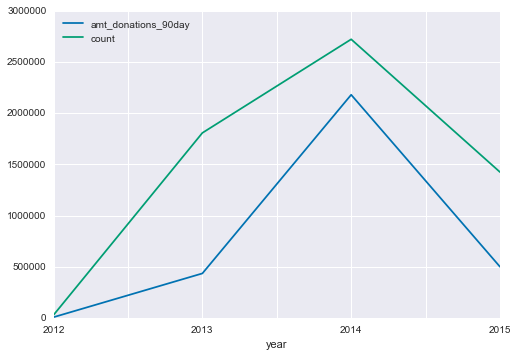

In [157]:
donate_group = pd.DataFrame(trend_data.groupby('year')['amt_donations_90day','count'].sum())
donate_group[1:5].plot()

### Similarly, the total amount of money donated by new members in their first 90 days peaked in 2014.  2015 ended up with higher donations than 2013, but just barely.

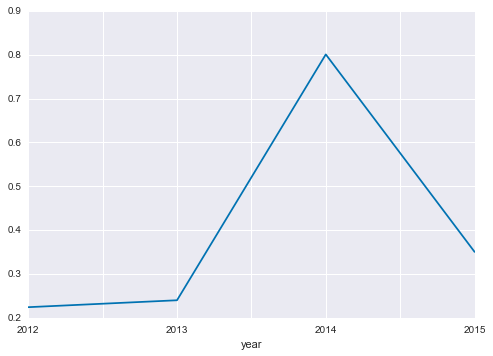

In [162]:
donate_group['per_person'] = donate_group['amt_donations_90day'].divide(donate_group['count'])
donate_group[1:5]['per_person'].plot()

### Now we see another problem, which is that donations per new member are also way down from 2014, through have not fallen to 2013 levels.  This is important, because it means that the decrease in revenue is not only due to the falling membership growth, but also because SumOfUs is not doing as well in soliciting donations from the new members it does bring in.

#### Can you make a bar plot or a histogram?

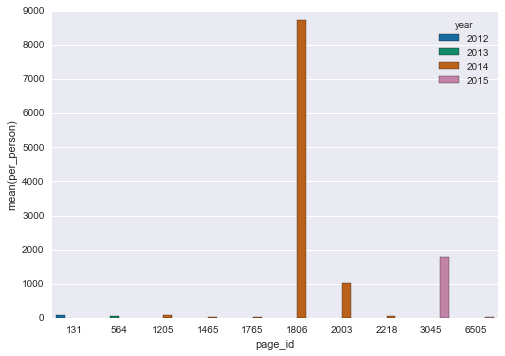

In [176]:
explore = pd.DataFrame(ag_data,columns=['page_id','count','page_created','amt_donations_90day'])
explore['per_person'] = explore['amt_donations_90day'].divide(explore['count'], axis='index') 
explore['year'] = explore['page_created'].str[:4]
explore_viz = explore.sort_values(by=['per_person'], ascending=False).head(10)
g = sns.barplot(x="page_id", y="per_person", hue="year", ci="none", data=explore_viz)

### I was interested in which campaigns were bringing in the most money per person from new members.  I ran a bar graph of the top 10 campaigns that had the highest per member donation rates and found that there were three dramatic outliers in the data set, two of which were in 2014.  One campaign had raised over 8734 dollars per person!  This was a campaign that had only brought in 59 new members, so one large donation skewed the per member rates at a campaign level.

In [ ]:
#how do I order the abouve graph?  the data is sorted properly
#insert histogram of per_member stats here

#### Can you compare two related quantities?

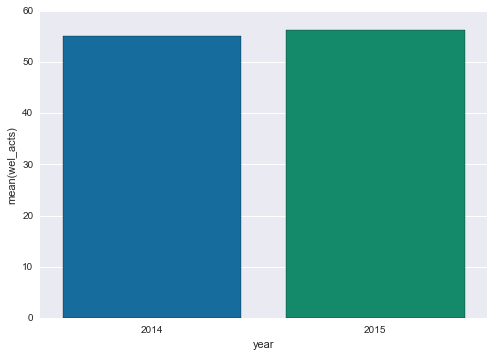

In [224]:
two_quant = pd.DataFrame(comp_data,columns=['page_id','count','page_created','wel_opens','wel_clicks','wel_acts'])
two_quant['year'] = two_quant['page_created'].str[:4]
two_quant_group = pd.DataFrame(two_quant.groupby('year')['wel_acts'].sum()).reset_index()
two_quant_group
two_quant_group = two_quant_group[3:5]
g = sns.barplot(x="year", y="wel_acts", data=two_quant_group,ci=None)

### When we look at the per person stats for actions on the welcome sequence, we see that 2015 actually has a slight edge on 2014.  This would imply that the welcome sequence optimization effort in 2015 was successful in driving more actions on the welcome sequence.  However, this isn't all good news, because it suggests that further welcome sequence optimization would bot necessarily drive more member sharing behavior, which would lead to further growth.  The low-hanging fruit has been picked; we now need to look at more substantive solutions.

#### Can you make a time-series plot?

In [226]:
# can't get this to work

#### Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

### While I had already known there was a peak in the data in 2014 and a drop off in 2015, seeing it visualized is helpful for understanding the extent of the problem, and even more helpful in communicating it to other people.  One hypothesis I would like to investigate is whether there were certain quarters or certain months in 2014 that were responsible for most of the increase.  If so, that would lead me to ask more questions about the campaigns we ran in those months and what commonalities they might have.

#### By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

### Right now, it is a compelling story, but a sad one.  To make the story stronger, I need to isolate the factors in 2014 that were driving our growth. Did we have a higher % of users come in from Facebook during that time?  Or a lower one?  Are there monthly patterns seen across years?  And how do the early indicators relate to the eventual success?  Finding these correlations will make this story more complete, and more useful to decision makers at SumOfUs.